**The main purpose:** 

Using Principal Component Analysis (PCA) extract a single factor which indirectly influence all the 0.901-submissions, this factor will be the final submission. You can use this method to increase the score of your own solutions.

**What's new:** 

- **Weighted** PCA approach is tested: more weight is added for the solution #5 [5] to make it more important for the PCA.
- 3 new 0.901-solution are added (see [8], [9], [10]).
- all the 0.901-solutions are updated to the latest versions (if the current version doesn't have 0.901 score than previous version is used (for example, s6-v1.csv dataset is used instead of the original kernel))

Previous version of this kernel is [here](https://www.kaggle.com/darbin/pca-blender-of-0-901-solutions?scriptVersionId=12188974)

In [1]:
# inspired by [0]
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
import os
print(os.listdir("../input"))

['s8v5-joshua-reed-santander-customer-transaction', '90-lines-solution-0-901-fast', 'santander-augment-to-the-rescue', 's3v32-ashish-gupta-eda-pca-scaler-lgbm', 's9v16-gauravtambi-lgbm-augmentation', 's7v19-subham-sharma-what-is-next-in-santander', 'eda-pca-lgbm-santander-transactions', 'best-parameters-lb-0-900', 'santander-magic-lgb-0-901', 'lightgbm-with-data-augmentation', 'lgbm-training-augmentation', 'eda-pca-simple-lgbm-on-kfold-technique', 'lgb-2-leaves-augment', 'santander-customer-transaction-prediction', 's1v8-nanashi-90-lines-solution-0901-fast', 's6v1-ole-morten-light-gbm-with-data-augment']


In [2]:
# inspired by [...]
s1=pd.read_csv('../input/s1v8-nanashi-90-lines-solution-0901-fast/s1-v8.csv')['target']#[1]
s2=pd.read_csv('../input/santander-magic-lgb-0-901/submission.csv')['target']#[2]
s3=pd.read_csv('../input/s3v32-ashish-gupta-eda-pca-scaler-lgbm/s3-v32.csv')['target']#[3]
s4=pd.read_csv('../input/eda-pca-simple-lgbm-on-kfold-technique/submission26.csv')['target']#[4]
s5=pd.read_csv('../input/lgb-2-leaves-augment/lgb_submission.csv')['target']#[5]
s6=pd.read_csv('../input/s6v1-ole-morten-light-gbm-with-data-augment/s6-v1.csv')['target']#[6]
s7=pd.read_csv('../input/s7v19-subham-sharma-what-is-next-in-santander/s7-v19.csv')['target']#[7]
s8=pd.read_csv('../input/s8v5-joshua-reed-santander-customer-transaction/s8-v5.csv')['target']#[8]
s9=pd.read_csv('../input/s9v16-gauravtambi-lgbm-augmentation/s9-v16.csv')['target']#[9]
s10=pd.read_csv('../input/best-parameters-lb-0-900/submission.csv')['target']#[10]

submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')

solutions_set = pd.DataFrame({'s1': s1, 's2': s2, 's3': s3, 's4': s4, 's5': s5, 's6': s6,
                              's7': s7, 's8': s8, 's9': s9, 's10': s10})

# Solutions analysis

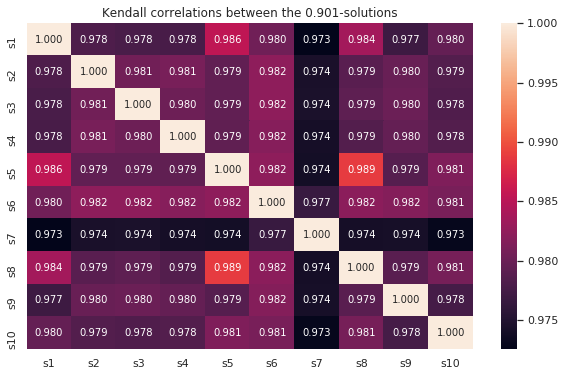

In [3]:
# since we use AUC, and distribution of the probability is not Normal, Kendal correlation is more appropriate
kendall = solutions_set.corr(method = 'kendall')
plt.figure(figsize=(10, 6))
plt.title('Kendall correlations between the 0.901-solutions')
sns.heatmap(kendall, annot = True, fmt = ".3f")

Submission s7 remains the less correlated with the other solutions.

Solution s8 has a good correlation with s5 and s1.

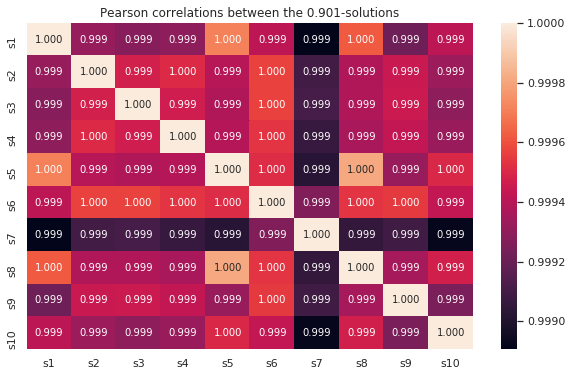

In [4]:
# Pearson correlations between the submissions
pearson = solutions_set.corr(method = 'pearson')
plt.figure(figsize=(10, 6))
plt.title('Pearson correlations between the 0.901-solutions')
sns.heatmap(pearson, annot=True, fmt=".3f")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


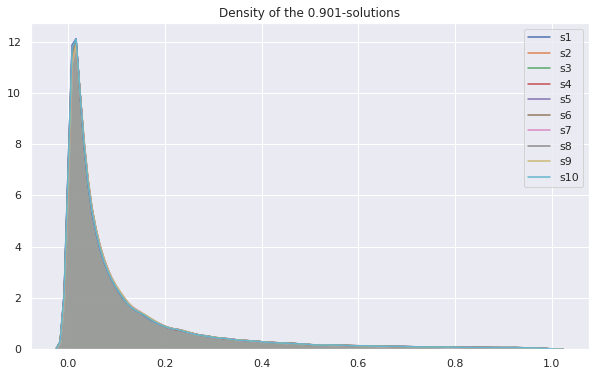

In [5]:
# Density of the solutions
plt.figure(figsize=(10, 6))
plt.title('Density of the 0.901-solutions')
sns.kdeplot(s1, label = 's1', shade = True)
sns.kdeplot(s2, label = 's2', shade = True)
sns.kdeplot(s3, label = 's3', shade = True)
sns.kdeplot(s4, label = 's4', shade = True)
sns.kdeplot(s5, label = 's5', shade = True)
sns.kdeplot(s6, label = 's6', shade = True)
sns.kdeplot(s7, label = 's7', shade = True)
sns.kdeplot(s8, label = 's8', shade = True)
sns.kdeplot(s9, label = 's9', shade = True)
sns.kdeplot(s10, label = 's10', shade = True)

# PCA. Extract one single factor, which explains all the 7 submissions variations

In [6]:
# Preprocessing: scaling (scale all the submissions to vars with mean = 0 and std = 1 since PCA doesn't like inputs with different scales)
scaler = StandardScaler()
solutions_set_scaled = pd.DataFrame(scaler.fit_transform(solutions_set),
                                    columns = ['s1', 's2', 's3', 's4', 's5', 's6', 
                                               's7', 's8', 's9', 's10'])

In [7]:
solutions_set_scaled.describe().applymap('{:,.2f}'.format)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
count,"200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00"
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.69,-0.70,-0.70,-0.70,-0.69,-0.71,-0.71,-0.70,-0.71,-0.69
25%,-0.59,-0.59,-0.59,-0.59,-0.59,-0.59,-0.59,-0.59,-0.59,-0.59
50%,-0.40,-0.40,-0.40,-0.40,-0.40,-0.40,-0.40,-0.40,-0.40,-0.40
75%,0.12,0.12,0.13,0.12,0.12,0.13,0.13,0.13,0.13,0.12
max,5.23,5.25,5.26,5.24,5.23,5.30,5.30,5.26,5.28,5.22


In [8]:
# increase the weight for the s5
solutions_set_scaled['s5'] = solutions_set_scaled['s5'] * 3

# table style (red color)
def red_color(val):
    color = 'red'
    return 'color: %s' % color

# table: implement styles
solutions_set_scaled_style1 = solutions_set_scaled.describe().applymap('{:,.2f}'.format)
solutions_set_scaled_style1.style.applymap(red_color, subset = ['s5'])

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
count,"200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00","200,000.00"
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00
min,-0.69,-0.70,-0.70,-0.70,-2.08,-0.71,-0.71,-0.70,-0.71,-0.69
25%,-0.59,-0.59,-0.59,-0.59,-1.77,-0.59,-0.59,-0.59,-0.59,-0.59
50%,-0.40,-0.40,-0.40,-0.40,-1.21,-0.40,-0.40,-0.40,-0.40,-0.40
75%,0.12,0.12,0.13,0.12,0.37,0.13,0.13,0.13,0.13,0.12
max,5.23,5.25,5.26,5.24,15.69,5.30,5.30,5.26,5.28,5.22


Note that we've just increased the importance of the s5 (std = 3 instead of 1) for the PCA

In [9]:
# PCA
pca = PCA(n_components = 1)
factor = pca.fit_transform(solutions_set_scaled)
print(pca.explained_variance_ratio_)

[0.99957844]


By the way: increasing the weight for s5 has increased the explained_variance_ratio from 0.99942 to 0.99957

In [10]:
# Loadings. These loadings can be interpreted as weights of each submission
pca.components_

array([[0.23569515, 0.23566704, 0.23566318, 0.23566444, 0.70721077,
        0.23569021, 0.23558817, 0.23571662, 0.23565318, 0.23567034]])

Check the importance of the s5 in the final PCA solution: 0.71 comparing to 0.23 for other solutions

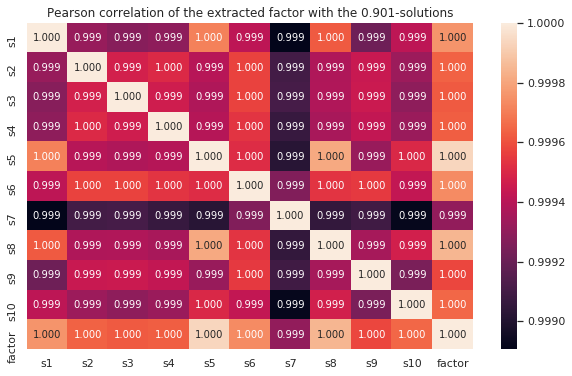

In [11]:
# Pearson correlation of the submissions with the extracted factor
plt.figure(figsize=(10, 6))
plt.title('Pearson correlation of the extracted factor with the 0.901-solutions')
solutions_set_scaled['factor'] = factor
pearson_pca = solutions_set_scaled.corr(method = 'pearson')
sns.heatmap(pearson_pca, annot = True, fmt = ".3f")

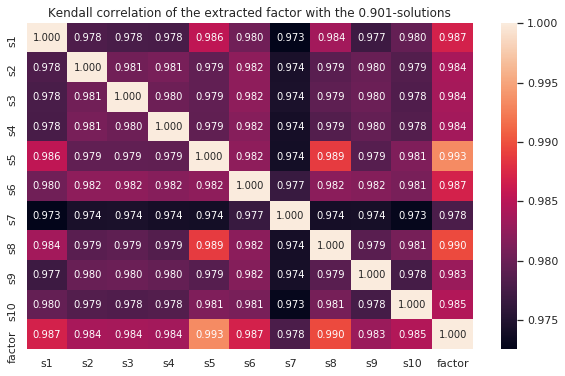

In [12]:
# Kendall correlation of the submissions with the extracted factor
plt.figure(figsize=(10, 6))
plt.title('Kendall correlation of the extracted factor with the 0.901-solutions')
kendall_pca = solutions_set_scaled.corr(method = 'kendall')
sns.heatmap(kendall_pca, annot = True, fmt = ".3f")

Kendall correlations between the extracted factor and the submissions are **higher** (statistically significant?) than any other correlation between the submissions. High correlation of the factor with s5 [5] solution shows the higher importance of that solution for the final PCA model.

# Submission

In [13]:
# PCA blender
# Since we use AUC the values for the target don't really matter
# What matters is the order of the target values
submission['target'] = solutions_set_scaled['factor']

filename="blended_submission_{:%Y-%m-%d_%H_%M}.csv".format(datetime.now())
submission.to_csv(filename, index=False)

## *Stay tuned, I'll continue to add 0.901 solutions to the blender

# Inspired by:

[0] [Nanashi (#242), "Simple blend (my best score)"](https://www.kaggle.com/jesucristo/simple-blend-my-best-score)

[1] [Nanashi (#242), "90 lines solution 0.901 #Fast": V8](https://www.kaggle.com/jesucristo/90-lines-solution-0-901-fast?scriptVersionId=11837989). Dataset: s1-v8

[2] [Nanashi (#242), "Santander Magic LGB 0.901": V21](https://www.kaggle.com/jesucristo/santander-magic-lgb-0-901?scriptVersionId=11960403). Dataset: original (current version of kernel)

[3] [Ashish Gupta (#237), "EDA, PCA + LGBM : Santander Transactions": V32](https://www.kaggle.com/roydatascience/eda-pca-lgbm-santander-transactions?scriptVersionId=11798375). Dataset: s3-v32

[4] [Ashish Gupta (#237), "EDA, PCA + Simple LGBM on KFold Technique"](https://www.kaggle.com/roydatascience/eda-pca-simple-lgbm-on-kfold-technique). Dataset: original (current version of kernel)

[5] [Jiwei Liu (#5), "LGB 2 leaves + augment"](https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment). Dataset: original (current version of kernel)

[6] [Ole Morten Grodås (#649), "Lightgbm with data augmentation"](https://www.kaggle.com/omgrodas/lightgbm-with-data-augmentation). Dataset: original (current version of kernel)

[7] [Subham Sharma (#1977), "Santander (-: Augment to the rescue": V19](https://www.kaggle.com/subhamsharma96/santander-augment-to-the-rescue?scriptVersionId=11821134). Dataset: s7-v19

[8] [Joshua Reed (#1821), "Santander Customer Transaction Prediction": V5](https://www.kaggle.com/josh24990/santander-customer-transaction-prediction). Dataset: s8-v5

[9] [GauravTambi (#1497), "LGBM + Augmentation": V16](https://www.kaggle.com/gtambi/lgbm-augmentation?scriptVersionId=12043767). Dataset: s9-v16

[10] [Deepak N (#2039), "Best Parameters LB 0.900"](https://www.kaggle.com/deepak525/best-parameters-lb-0-900). Dataset: original (current version of kernel)

# PCA components:
- [sklearn.decomposition.pca](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)